In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

In [2]:
PATH = os.getcwd()
os.chdir("..")
PATH = os.path.abspath(os.curdir)

In [3]:
df = pd.read_csv(os.path.join(PATH, '04 - Data/Final Data/DF_NO_STATES.csv'))
df = df.drop(columns=['nAllNeonic']) #sum of all pesticides

In [4]:
# Set train and test set, test is anything beyond 2016
train = df[df['year'] < 2016]
test = df[df['year'] >= 2016]
X_train = train.drop(columns=['yieldpercol', 'year'])
y_train = train['yieldpercol']
X_test = test.drop(columns=['yieldpercol', 'year'])
y_test = test['yieldpercol']

# Normalize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler()
scaler2.fit(X_test)
X_test = scaler2.transform(X_test)

df = df.drop(columns=['yieldpercol', 'year']) #so we can use df.columns to call feature names

# Ridge

In [5]:
model_ridge = Ridge()
coef = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train, y_train)
    coef.append(model_ridge.coef_)
    errors_train.append(mean_squared_error(y_train,model_ridge.predict(X_train)))
    errors_test.append(mean_squared_error(y_test,model_ridge.predict(X_test)))

Best alpha:  0.02072921779595372
Train MSE:  141.91895811922186
Test MSE:  157.94418527109048
Train RMSE:  11.912974360722089
Test RMSE:  12.567584703159572


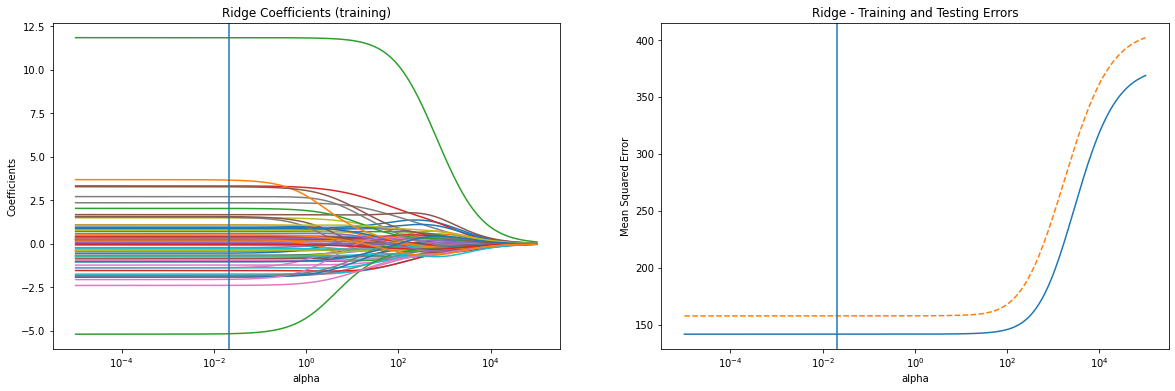

In [6]:
min_val_ridge = min(errors_test) #minimum cv
i = errors_test.index(min_val_ridge) #index of minimum cv

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge - Training and Testing Errors')
plt.axis('tight')

print("Best alpha: ", alphas[i])
print("Train MSE: ", errors_train[i])
print("Test MSE: ", errors_test[i])
print("Train RMSE: ", math.sqrt(errors_train[i]))
print("Test RMSE: ", math.sqrt(errors_test[i]))

plt.show()

In [7]:
for j in range(len(coef[i])):
  print(df.columns[j], coef[i][j])

numcol 0.9554096130220872
nCLOTHIANIDIN 0.4688063444822907
nIMIDACLOPRID -1.012500608131319
nTHIAMETHOXAM 0.2534669959014462
nACETAMIPRID 0.08762275914194179
nTHIACLOPRID 0.16999721669925857
prevyear_nCLOTHIANIDIN -1.8080147770641555
prevyear_nIMIDACLOPRID -0.7102667839727085
prevyear_nTHIAMETHOXAM 1.497964872196823
prevyear_nACETAMIPRID -1.7442580968236543
prevyear_nTHIACLOPRID -0.02248995393911844
NorthDakota_PrevYear -0.43116983822565924
prevyearyield 11.854325456263624
avg_temp 3.3266006355280995
anomaly 0.7943305921507545
varroa 0.2395709036180627
spores 0.36532681392201677
cbpv_max 2.361424366284875
dwv_max 0.0
iapv_max -0.7903858637682549
kbv_max 0.8846579906363755
sbpv_max 0.0
abpv_max 0.7063860009578422
dwv-b_max -0.37667174317634833
lsv2_max -0.6601702401689262
mkv_max 0.0
cbpv_prob -0.9771706332363058
dwv_prob -0.7835266208365759
iapv_prob 0.7758542357597579
kbv_prob 0.4257789195609982
sbpv_prob 0.0
abpv_prob 0.15915573319978935
dwv-b_prob -0.3766717431112025
lsv2_prob 0.256

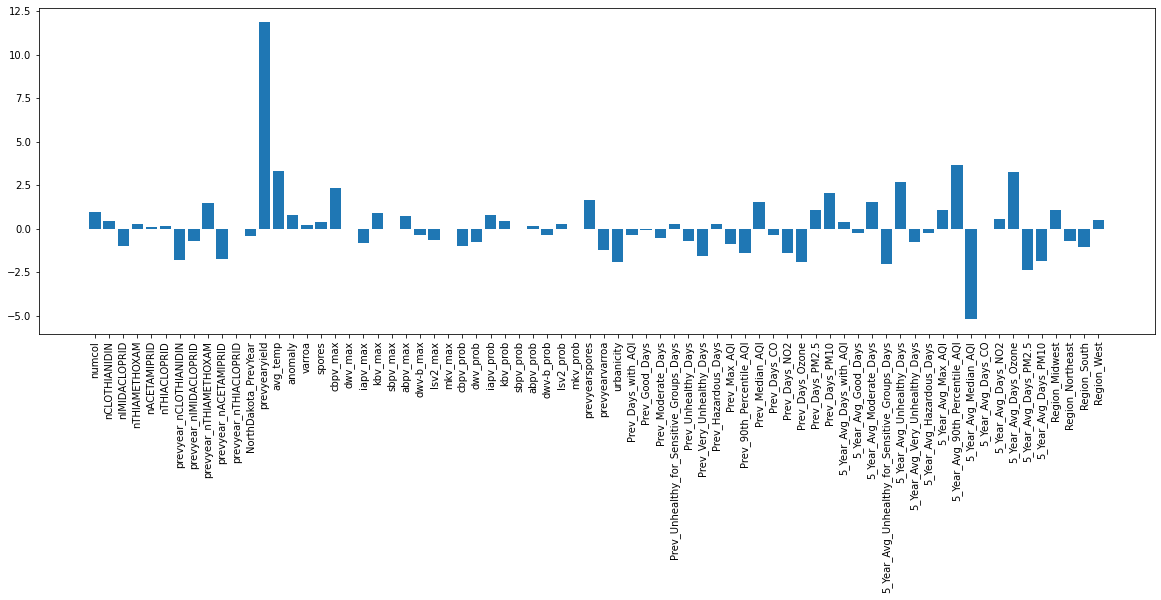

In [8]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns, coef[i])
plt.xticks(rotation=90)
plt.show()

# Lasso

In [9]:
model_lasso = Lasso(tol = 30)
coef = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coef.append(model_lasso.coef_)
    errors_train.append(mean_squared_error(y_train,model_lasso.predict(X_train)))
    errors_test.append(mean_squared_error(y_test,model_lasso.predict(X_test)))

Best alpha:  0.8406652885618334
Train MSE:  157.51725605575885
Test MSE:  153.9288569987778
Train RMSE:  12.550587876898788
Test RMSE:  12.406806881658866


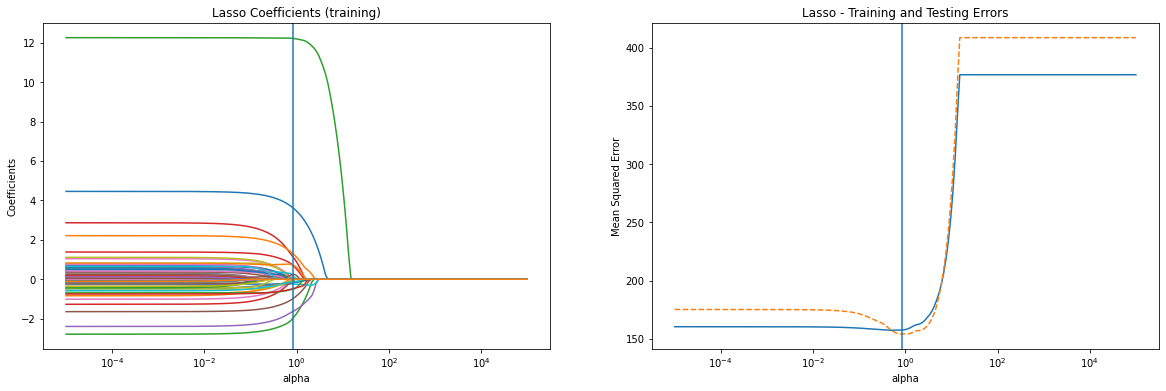

In [10]:
min_val_lasso = min(errors_test) #minimum cv
i = errors_test.index(min_val_lasso) #index of minimum cv

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso - Training and Testing Errors')
plt.axis('tight')

print("Best alpha: ", alphas[i])
print("Train MSE: ", errors_train[i])
print("Test MSE: ", errors_test[i])
print("Train RMSE: ", math.sqrt(errors_train[i]))
print("Test RMSE: ", math.sqrt(errors_test[i]))

plt.show()

In [11]:
for j in range(len(coef[i])):
  print(df.columns[j], coef[i][j])

numcol 3.61891385361626
nCLOTHIANIDIN -0.0
nIMIDACLOPRID -1.9688631540934916
nTHIAMETHOXAM 1.1388407803146672
nACETAMIPRID -1.6333810358698075
nTHIACLOPRID -0.9789547504999094
prevyear_nCLOTHIANIDIN -0.0
prevyear_nIMIDACLOPRID -0.0
prevyear_nTHIAMETHOXAM 0.07810404505953036
prevyear_nACETAMIPRID -0.24504616223172984
prevyear_nTHIACLOPRID -0.17772264613276972
NorthDakota_PrevYear 1.2924150210871017
prevyearyield 12.227516683602667
avg_temp 0.6950660638368975
anomaly 0.0
varroa -0.0
spores 0.0
cbpv_max -0.0
dwv_max 0.0
iapv_max -0.0
kbv_max 0.0
sbpv_max 0.0
abpv_max 0.0
dwv-b_max -0.04971278994903773
lsv2_max -0.0
mkv_max 0.0
cbpv_prob -0.0
dwv_prob -0.08409386290171712
iapv_prob 0.0
kbv_prob 0.17949793570643988
sbpv_prob 0.0
abpv_prob 0.7136492413865537
dwv-b_prob -0.0
lsv2_prob 0.0
mkv_prob 0.0
prevyearspores 0.25448661953925195
prevyearvarroa -0.0
urbanicity -0.0
Prev_Days_with_AQI 0.0
Prev_Good_Days 0.0
Prev_Moderate_Days 0.0
Prev_Unhealthy_for_Sensitive_Groups_Days -0.06133874043234

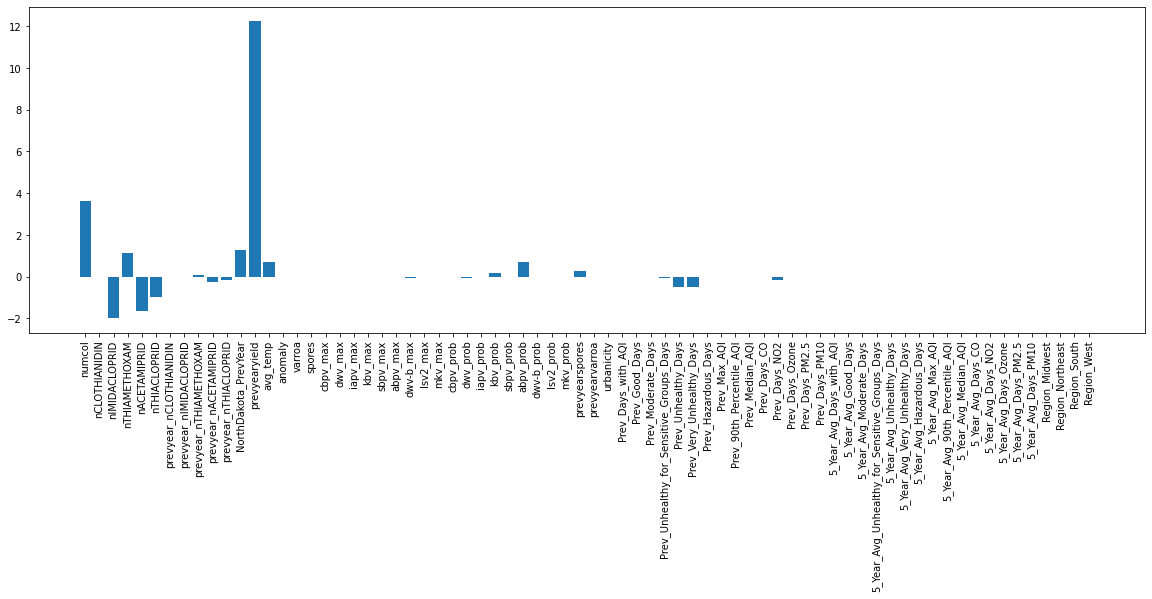

In [12]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns, coef[i])
plt.xticks(rotation=90)
plt.show()